# Previsão de Custo Anual – SaúdeViva  
Este projeto apresenta um estudo baseado na empresa fictícia **SaúdeViva**, que oferece planos personalizados com previsões de custo calculadas via Machine Learning.  

A análise considera fatores individuais como idade, altura, peso, tabagismo, número de filhos e região de residência para garantir maior transparência na precificação.  

# Coleta de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from src.utils import carregar_dados
raw = carregar_dados(caminho="dados/Train_Data.csv")

# Entendimento dos dados

In [3]:
# Visualização do dataframe
display(raw)

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452


# Análise Exploratória de Dados (EDA)

In [4]:
# Quantidade de linhas
# Quantidade de colunas
# Nome de cada coluna
# Quantos valores não-nulos existem em cada coluna
# O tipo de dado em cada coluna
# Uso de memória pelo DataFrame
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [5]:
# Quantos valores nulos existem em cada coluna
raw.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [6]:
# Estatística descritiva das colunas numéricas
# count: quantidade de valores não nulos
# mean: média
# std: desvio padrão
# min: 00% (valor mínimo)
# Q1: 25%
# Q2: 50% (mediana)
# Q3: 75%
# max: 100% (valor máximo)
print(raw.describe(include=[np.number]))

               age          bmi     children       charges
count  3630.000000  3630.000000  3630.000000   3630.000000
mean     38.887036    30.629652     2.503581  12784.808644
std      12.151029     5.441307     1.712568  10746.166743
min      18.000000    15.960000     0.000000   1121.873900
25%      29.000000    26.694526     1.000000   5654.818262
50%      39.170922    30.200000     3.000000   9443.807222
75%      48.343281    34.100000     4.000000  14680.407505
max      64.000000    53.130000     5.000000  63770.428010


In [7]:
# Estatística descritiva das colunas object
# unique: quantidade de valores diferentes
# top: qual é a moda da coluna
# freq: quantas vezes cada moda se repete
print(raw.describe(include="object"))

         sex smoker     region
count   3630   3630       3630
unique     2      2          4
top     male     no  southeast
freq    2029   3070       1021


In [8]:
# Moda de cada coluna
print(raw.mode().iloc[[0]])

    age   sex   bmi smoker     region  children   charges
0  19.0  male  32.3     no  southeast       0.0  1137.011


In [9]:
# Número de valores únicos em cada coluna
raw.nunique()

age         1589
sex            2
bmi         2322
smoker         2
region         4
children       6
charges     2951
dtype: int64

In [10]:
# Visualização dos valores nas colunas categóricas
# Usar em colunas com poucos valores únicos
# Identifica se há valores redundantes
# Identifica se há espaços em branco
print(raw["sex"].unique())
print(raw["smoker"].unique())
print(raw["region"].unique())

['male' 'female']
['no' 'yes']
['northeast' 'southeast' 'northwest' 'southwest']


In [11]:
# Quantidade de linhas duplicadas
raw.duplicated().sum()

np.int64(679)

In [12]:
# Visualização de linhas duplicadas
# Só devem ser removidas se tiverem ID
print(raw[raw.duplicated()])

            age     sex        bmi smoker     region  children       charges
2217  19.000000    male  30.590000     no  northwest         0   1639.563100
2952  34.000000    male  25.270000     no  northwest         1   4894.753300
2953  33.000000  female  28.270000     no  southeast         1   4779.602300
2954  33.398132    male  29.352224     no  southwest         4   6216.387358
2955  39.000000    male  27.539985     no  southeast         5   8844.634442
...         ...     ...        ...    ...        ...       ...           ...
3625  48.820767  female  41.426984     no  northwest         4  10987.324964
3626  38.661977  female  26.202557     no  southeast         2  11735.844352
3627  56.000000    male  40.300000     no  southwest         0  10602.385000
3628  48.061207  female  34.930624     no  southeast         1   8976.140452
3629  37.598865  female  25.219233     no  northeast         3   7027.698968

[679 rows x 7 columns]


### Distribuição assimétrica das colunas numéricas

In [13]:
# Distribuição assimétrica das colunas numéricas
# Skewness (assimetria) é a distribuição dos dados em relação a média
# Assimetria positiva: Maior distribuição em valores baixos
# Assimetria negativa: Mais distribuição em valores altos
raw.skew(numeric_only=True)

age         0.049292
bmi         0.353485
children   -0.009063
charges     1.774523
dtype: float64

### Histograma

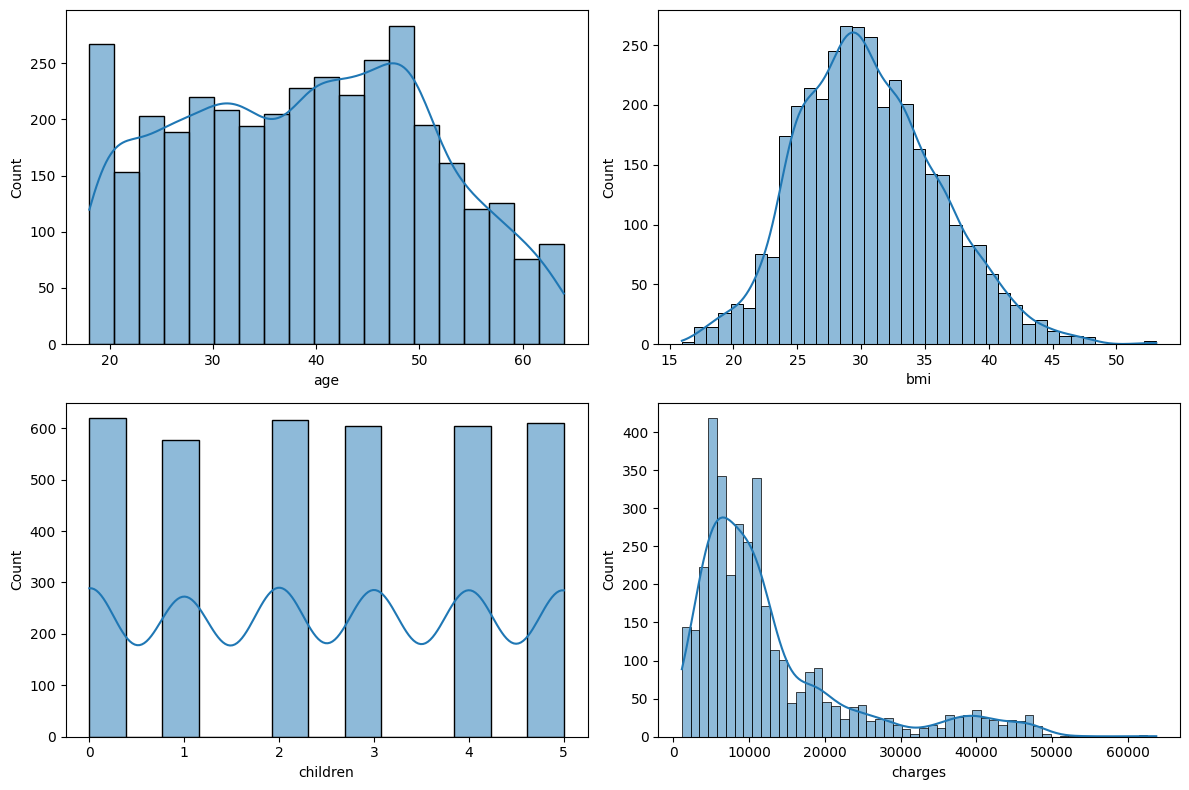

In [14]:
# Gráficos de barras com kde para todas ascolunas numéricas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 linhas, 2 colunas
sns.histplot(data=raw, x="age", kde=True, ax=axes[0, 0]) # linha 0, coluna 0
sns.histplot(data=raw, x="bmi", kde=True, ax=axes[0, 1]) # linha 0, coluna 1
sns.histplot(data=raw, x="children", kde=True, ax=axes[1, 0]) # linha 1, coluna 0
sns.histplot(data=raw, x="charges", kde=True, ax=axes[1, 1]) # linha 1, coluna 1
plt.tight_layout() # Espaçamento automático
plt.show() # Renderizar plotagem

### Boxplot

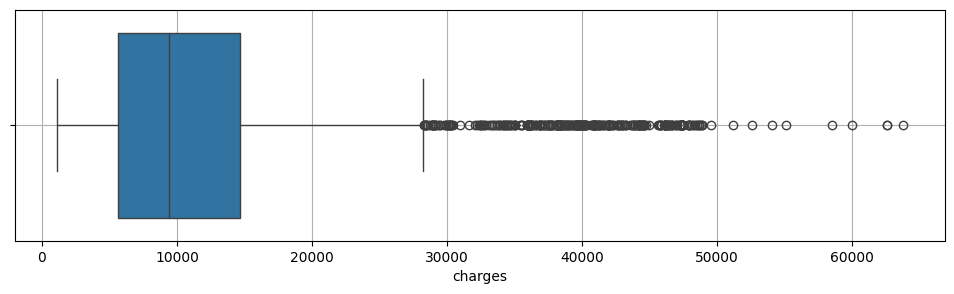

In [15]:
# Define tamanho da figura (horizontal, vertical)
plt.figure(figsize=(12, 3))
# Cria um boxplot horizontal para a coluna 'charges'
# x: Gráfico será horizontal
# y: Gráfico será vertical
sns.boxplot(x=raw["charges"])
# Adiciona uma grade de fundo para facilitar a leitura dos valores
plt.grid(True)
# Exibe o gráfico na tela
plt.show()

# Pré-processamento de dados

### Dados brutos

In [16]:
# Visualização dos dados brutos
display(raw)

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452


In [17]:
# Passando dados brutos para o dataframe que será pré-processado
df = raw
# Convertendo object para category
df[["sex","smoker","region"]] = raw[["sex","smoker","region",]].astype("category")
# Limitando casas decimais
df["age"] = raw["age"].astype("int64")
df["bmi"] = raw["bmi"].round(2)
df["charges"] = raw["charges"].round(2)
# One-Hot Encoding nas variáveis categórias para otimizar a performance nos modelos
df = pd.get_dummies(df, drop_first=True)

### Classificando BMI

In [18]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "baixo"
    elif 18.5 <= bmi < 25:
        return "normal"
    elif 25 <= bmi < 30:
        return "sobrepeso"
    else:
        return "obesidade"

df["bmi_category"] = raw["bmi"].apply(categorize_bmi).astype("category")


### Dados pré-processados

In [19]:
# Visualização dos dados pré-processados
display(df.select_dtypes(include=["number", "bool", "category"]))

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_category
0,21,25.74,2,3279.87,True,False,False,False,False,sobrepeso
1,36,25.74,3,21454.49,False,True,False,True,False,sobrepeso
2,18,30.03,1,1720.35,True,False,False,True,False,obesidade
3,37,30.68,3,6801.44,True,False,False,False,False,obesidade
4,58,32.01,1,11946.63,True,False,False,True,False,obesidade
...,...,...,...,...,...,...,...,...,...,...
3625,48,41.43,4,10987.32,False,False,True,False,False,obesidade
3626,38,26.20,2,11735.84,False,False,False,True,False,sobrepeso
3627,56,40.30,0,10602.38,True,False,False,False,True,obesidade
3628,48,34.93,1,8976.14,False,False,False,True,False,obesidade


# Baseline

In [20]:
# Separando colunas que serão usadas para treinar o modelo
df = df[["age","sex_male","smoker_yes", "region_northwest", "region_southeast","region_southwest"]]
x = df.iloc[:,:-1]  # todas as linhas, todas as colunas menos a última (variáveis independentes que serão usadas para ensinar o modelo)
y = df.iloc[:,-1]   # todas as linhas, somente a última coluna (variável dependente, que o modelo vai aprender a prever)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predição baseline: o modelo sempre prevê a média dos valores de y
y_pred = [y.mean()] * len(y)

# Avaliando a baseline com explicações no print
print(f"MAE (Erro Absoluto Médio): {mean_absolute_error(y, y_pred):.3f}  -> média dos erros absolutos entre previsto e real (quanto menor, melhor)")
print(f"MSE (Erro Quadrático Médio): {mean_squared_error(y, y_pred):.3f}  -> média dos erros ao quadrado, penaliza erros grandes (quanto menor, melhor)")
print(f"RMSE (Raiz do Erro Quadrático Médio): {np.sqrt(mean_squared_error(y, y_pred)):.3f}  -> erro médio na unidade original da variável alvo (quanto menor, melhor)")
print(f"R² (Coeficiente de Determinação): {r2_score(y, y_pred):.3f}  -> mede o quanto o modelo explica a variabilidade dos dados (quanto mais próximo de 1, melhor)")


MAE (Erro Absoluto Médio): 0.359  -> média dos erros absolutos entre previsto e real (quanto menor, melhor)
MSE (Erro Quadrático Médio): 0.179  -> média dos erros ao quadrado, penaliza erros grandes (quanto menor, melhor)
RMSE (Raiz do Erro Quadrático Médio): 0.423  -> erro médio na unidade original da variável alvo (quanto menor, melhor)
R² (Coeficiente de Determinação): 0.000  -> mede o quanto o modelo explica a variabilidade dos dados (quanto mais próximo de 1, melhor)


# Divisão treino/teste 

In [22]:
from sklearn.model_selection import train_test_split

# Divide os dados em conjuntos de treino e teste
# x e y são separados em x_train (entradas para treino), x_test (entradas para teste),
# y_train (rótulos para treino) e y_test (rótulos para teste)
# test_size=0.2 significa que 20% dos dados serão usados para teste, e 80% para treino
# random_state=0 faz a divisão dos dados ser sempre a mesma, permitindo reprodutibilidade
# reprodutibilidade significa que quem rodar o código de novo, terá o mesmo resultado

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Testando modelos

### Regressão Linear

In [23]:
# Regressão Linear
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
lr_reg = lr_reg.fit(x_train, y_train)

# Predição
y_pred = lr_reg.predict(x_test)

# Scores
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R² : {r2_score(y_test, y_pred):.3f}")

MAE: 0.247
MSE: 0.116
RMSE: 0.341
R² : 0.329


### Regressão Ridge

In [24]:
# Regressão Ridge
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg = ridge_reg.fit(x_train, y_train)

# Predição
y_pred = ridge_reg.predict(x_test)

# Scores
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R² : {r2_score(y_test, y_pred):.3f}")


MAE: 0.247
MSE: 0.116
RMSE: 0.341
R² : 0.329


### Regressão Lasso

In [25]:
# Regressão Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg = lasso_reg.fit(x_train, y_train)

# Predição
y_pred = lasso_reg.predict(x_test)

# Scores
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R² : {r2_score(y_test, y_pred):.3f}")


MAE: 0.354
MSE: 0.174
RMSE: 0.417
R² : -0.001


### XGBoost Regressor

In [26]:
# XGBoost Regressor
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg = xgb_reg.fit(x_train, y_train)

# Predição
y_pred = xgb_reg.predict(x_test)

# Scores
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R² : {r2_score(y_test, y_pred):.3f}")


MAE: 0.220
MSE: 0.125
RMSE: 0.353
R² : 0.281


### LightGBM Regressor

In [27]:
# LightGBM Regressor
from lightgbm import LGBMRegressor
lgbm_reg = LGBMRegressor(verbose=-1)
lgbm_reg = lgbm_reg.fit(x_train, y_train)

# Predição
y_pred = lgbm_reg.predict(x_test)

# Scores
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R² : {r2_score(y_test, y_pred):.3f}")

MAE: 0.218
MSE: 0.112
RMSE: 0.335
R² : 0.354


### Random Forest Regressor

In [28]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg = rf_reg.fit(x_train, y_train)

# Predição
y_pred = rf_reg.predict(x_test)

# Scores
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R² : {r2_score(y_test, y_pred):.3f}")


MAE: 0.212
MSE: 0.122
RMSE: 0.350
R² : 0.294


- Otimizando Random Forest Regressor com Bayesian Optimization

In [29]:
# Random Forest Regressor + Bayesian Optimization
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Função de avaliação
def rf_evaluate(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    model = RandomForestRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return np.mean(scores)

# Espaço de busca
param_bounds = {
    'n_estimators': (50, 300),
    'max_depth': (5, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

# Executando Bayesian Optimization
optimizer = BayesianOptimization(f=rf_evaluate, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=15)

# Pegando os melhores hiperparâmetros
best_params = optimizer.max['params']
rf_reg = RandomForestRegressor(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    random_state=42
)

# Treinamento
rf_reg.fit(x_train, y_train)

# Predição
y_pred = rf_reg.predict(x_test)

# Avaliação
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R² : {r2_score(y_test, y_pred):.3f}")


|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | -0.1125   | 14.36     | 3.852     | 7.856     | 199.7     |
| 2         | -0.1079   | 8.9       | 1.468     | 2.465     | 266.5     |
| 3         | -0.1127   | 20.03     | 3.124     | 2.165     | 292.5     |
| 4         | -0.1162   | 25.81     | 1.637     | 3.455     | 95.85     |
| 5         | -0.1128   | 12.61     | 2.574     | 5.456     | 122.8     |
| 6         | -0.1078   | 8.74      | 2.153     | 3.048     | 267.7     |
| 7         | -0.1117   | 28.99     | 4.0       | 10.0      | 258.0     |
| 8         | -0.1071   | 5.0       | 4.0       | 10.0      | 254.6     |
| 9         | -0.1071   | 5.0       | 4.0       | 2.0       | 235.1     |
| 10        | -0.1071   | 5.0       | 4.0       | 10.0      | 50.0      |
| 11        | -0.1121   | 30.0      | 4.0       | 2.0       | 50.0      |
| 12        | -0.1119   | 30.0      | 

- Otimizando LightGBM Regressor com Bayesian Optmization
    - Apesar do resultado parecido com o do Random Forest, a performance do LightGBM é melhor, por isso ele será o modelo escolhido

In [30]:
# LightGBM Regressor + Bayesian Optimization
from bayes_opt import BayesianOptimization
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

# Função de avaliação
def lgbm_evaluate(n_estimators, max_depth, num_leaves, learning_rate):
    model = LGBMRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        num_leaves=int(num_leaves),
        learning_rate=learning_rate,
        random_state=42,
        verbose=-1  # Silencia os logs
    )
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return np.mean(scores)

# Espaço de busca
param_bounds = {
    'n_estimators': (50, 300),
    'max_depth': (5, 30),
    'num_leaves': (20, 50),
    'learning_rate': (0.01, 0.3)
}

# Executando Bayesian Optimization
optimizer = BayesianOptimization(f=lgbm_evaluate, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=15)

# Pegando os melhores hiperparâmetros
best_params = optimizer.max['params']
lgbm_reg = LGBMRegressor(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    num_leaves=int(best_params['num_leaves']),
    learning_rate=best_params['learning_rate'],
    random_state=42,
    verbose=-1  # Silencia os logs no treinamento final
)

# Treinamento
lgbm_reg.fit(x_train, y_train)

# Predição
y_pred = lgbm_reg.predict(x_test)

# Avaliação
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R² : {r2_score(y_test, y_pred):.3f}")


|   iter    |  target   | learni... | max_depth | n_esti... | num_le... |
-------------------------------------------------------------------------
| 1         | -0.1138   | 0.1186    | 28.77     | 233.0     | 37.96     |
| 2         | -0.1094   | 0.05525   | 8.9       | 64.52     | 45.99     |
| 3         | -0.1128   | 0.1843    | 22.7      | 55.15     | 49.1      |
| 4         | -0.1127   | 0.2514    | 10.31     | 95.46     | 25.5      |
| 5         | -0.1124   | 0.09823   | 18.12     | 158.0     | 28.74     |
| 6         | -0.1123   | 0.2197    | 21.7      | 105.7     | 21.92     |
| 7         | -0.1074   | 0.02427   | 5.462     | 200.1     | 41.71     |
| 8         | -0.1113   | 0.1151    | 7.026     | 200.3     | 39.86     |
| 9         | -0.1076   | 0.02808   | 5.751     | 198.9     | 43.64     |
| 10        | -0.1109   | 0.2125    | 5.139     | 198.0     | 42.24     |
| 11        | -0.1132   | 0.2879    | 6.461     | 197.8     | 45.18     |
| 12        | -0.1093   | 0.07169   | 

# Serialização do modelo (Salvando modelo treinado)
- Ao salvar (serializar) o modelo, ele não precisa ser treinado novamento

In [31]:
from src.utils import salvar_modelo
salvar_modelo(lgbm_reg)  # Salva o modelo no caminho padrão

# Desserialização do modelo (Carregando modelo treinado)

In [32]:
from src.utils import carregar_modelo
carregar_modelo()  # Carrega o modelo no caminho padrão

LGBMRegressor(learning_rate=np.float64(0.0206709573669649), max_depth=5,
              n_estimators=199, num_leaves=40, random_state=42, verbose=-1)

# Testando modelo carregado

In [33]:
# Carrega o modelo salvo no caminho padrão
lgbm_reg_carregado = carregar_modelo()  
# Testando o modelo carregado
y_pred_carregado = lgbm_reg_carregado.predict(x_test)

# Avaliação
print(f"MAE: {mean_absolute_error(y_test, y_pred_carregado):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_carregado):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_carregado)):.3f}")
print(f"R² : {r2_score(y_test, y_pred_carregado):.3f}")

MAE: 0.220
MSE: 0.109
RMSE: 0.330
R² : 0.371
